# DBSCAN

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [23]:
def test_dbscan(data, epsilon=1, min_samp=5):
    # eps: maximum distance between two samples for them to be considered in the same neighborhood
    # min_samples: minimum number of samples in a neighborhood to form a core point
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samp)
    labels = dbscan.fit_predict(data)

    # Visualize the clusters
    plt.figure(figsize=(8, 6))

    # Assign colors to clusters; noise points will be in black (-1 label)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for label, color in zip(unique_labels, colors):
        if label == -1:  # Noise points
            color = [0, 0, 0, 1]  # Black
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[0], cluster_points[1], color=color, s=50, label=f"Cluster {label}")

    plt.title("DBSCAN Clustering")
    plt.legend()
    plt.show()

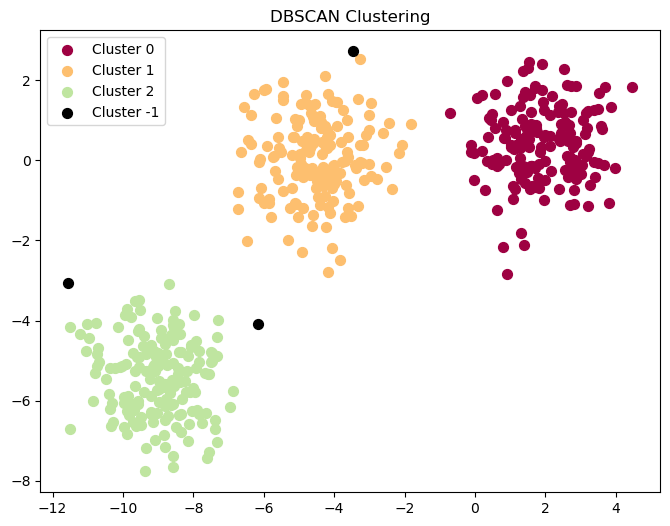

In [24]:

X = pd.read_csv("sample1.csv", header=None)

test_dbscan(X,1,5)


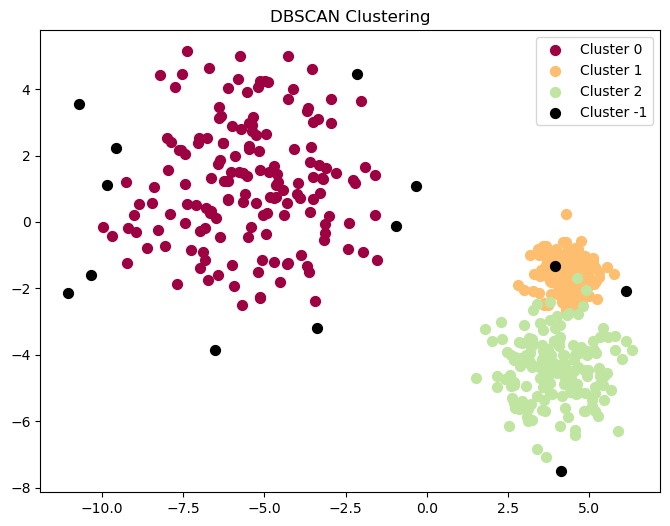

In [25]:
import pandas as pd
X2 = pd.read_csv("sample2.csv", header=None)

test_dbscan(X2)

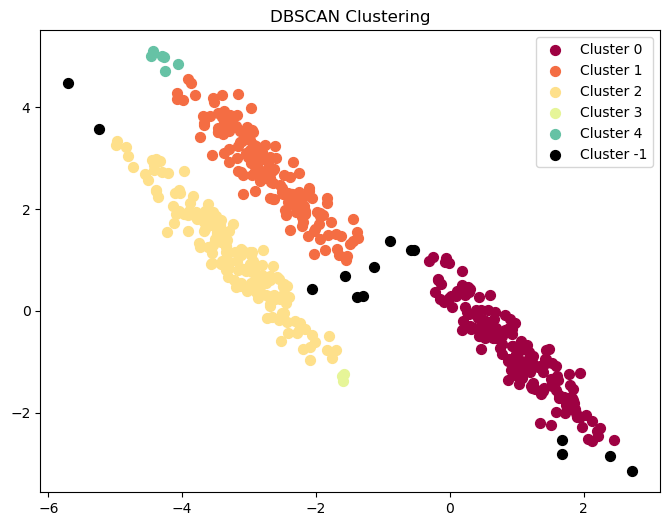

In [26]:
import numpy as np

# Anisotropicly distributed data
transformation = [[0.6, -0.6], [-0.4, 0.8]]
# transformation=PDP^-1 D=diag(1.2,0,2) and P=[[0.07107, -0.83205], [-0.707107, -0.5547]]
# the transformation expands in the direction [0.710,-0.707] and shrinks in the direction  [-0.832, -0.5547]

X3 = pd.DataFrame(np.dot(X, transformation))

test_dbscan(X3,0.3,3)


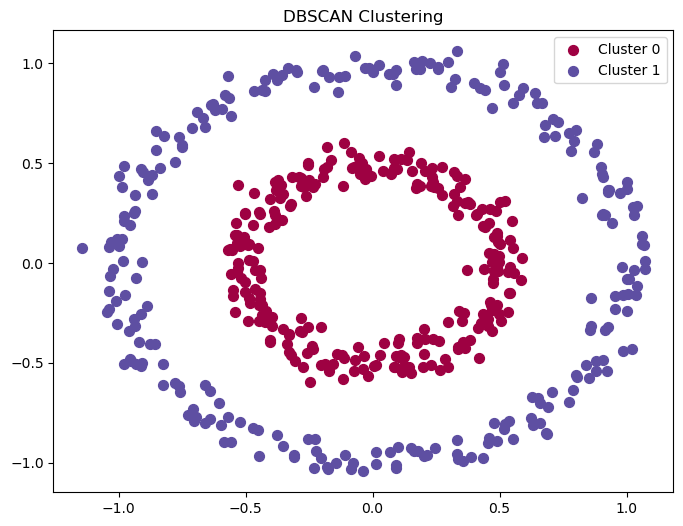

In [27]:
import pandas as pd
X4 = pd.read_csv("sample4.csv", header=None)

test_dbscan(X4,1,5)